In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as interact
import sklearn

In [143]:
df = pd.read_excel("M:\Vipul\Data Science\Lecture Notes\Machine Learning\Machine Learning 10th Lecture [ 3 Dec 2022]\Machine Learning\Machine Learning\/Portfolio Project -III/FlightPricePredictionModel/data/Train.xlsx")

In [144]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### 1. Which airline is most preffered airline.

In [146]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [147]:
df['Airline'].value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [148]:
# which airline has less than 1500 price
flight = df[df['Price'] < 2000]
Data_of_Airline = flight.sort_values(by = 'Price',ascending = False)
Data_of_Airline[['Airline','Source','Destination','Price']].head(5)

,Airline,Source,Destination,Price
228,SpiceJet,Mumbai,Hyderabad,1965
4595,SpiceJet,Mumbai,Hyderabad,1965
5327,SpiceJet,Mumbai,Hyderabad,1965
5742,SpiceJet,Mumbai,Hyderabad,1965
5788,SpiceJet,Mumbai,Hyderabad,1965


In [149]:
df[df['Price'] == 1965]['Airline'].unique()

array(['SpiceJet'], dtype=object)

In [150]:
def Func(df,a,b):
    a = df['Price']
    b = 'Source'
    c = df[a == 1965][b].unique()
    print("The Result are {}".format(c))

a = df['Price']
e = 'Destination'
Func(df,a,e)

The Result are ['Mumbai']


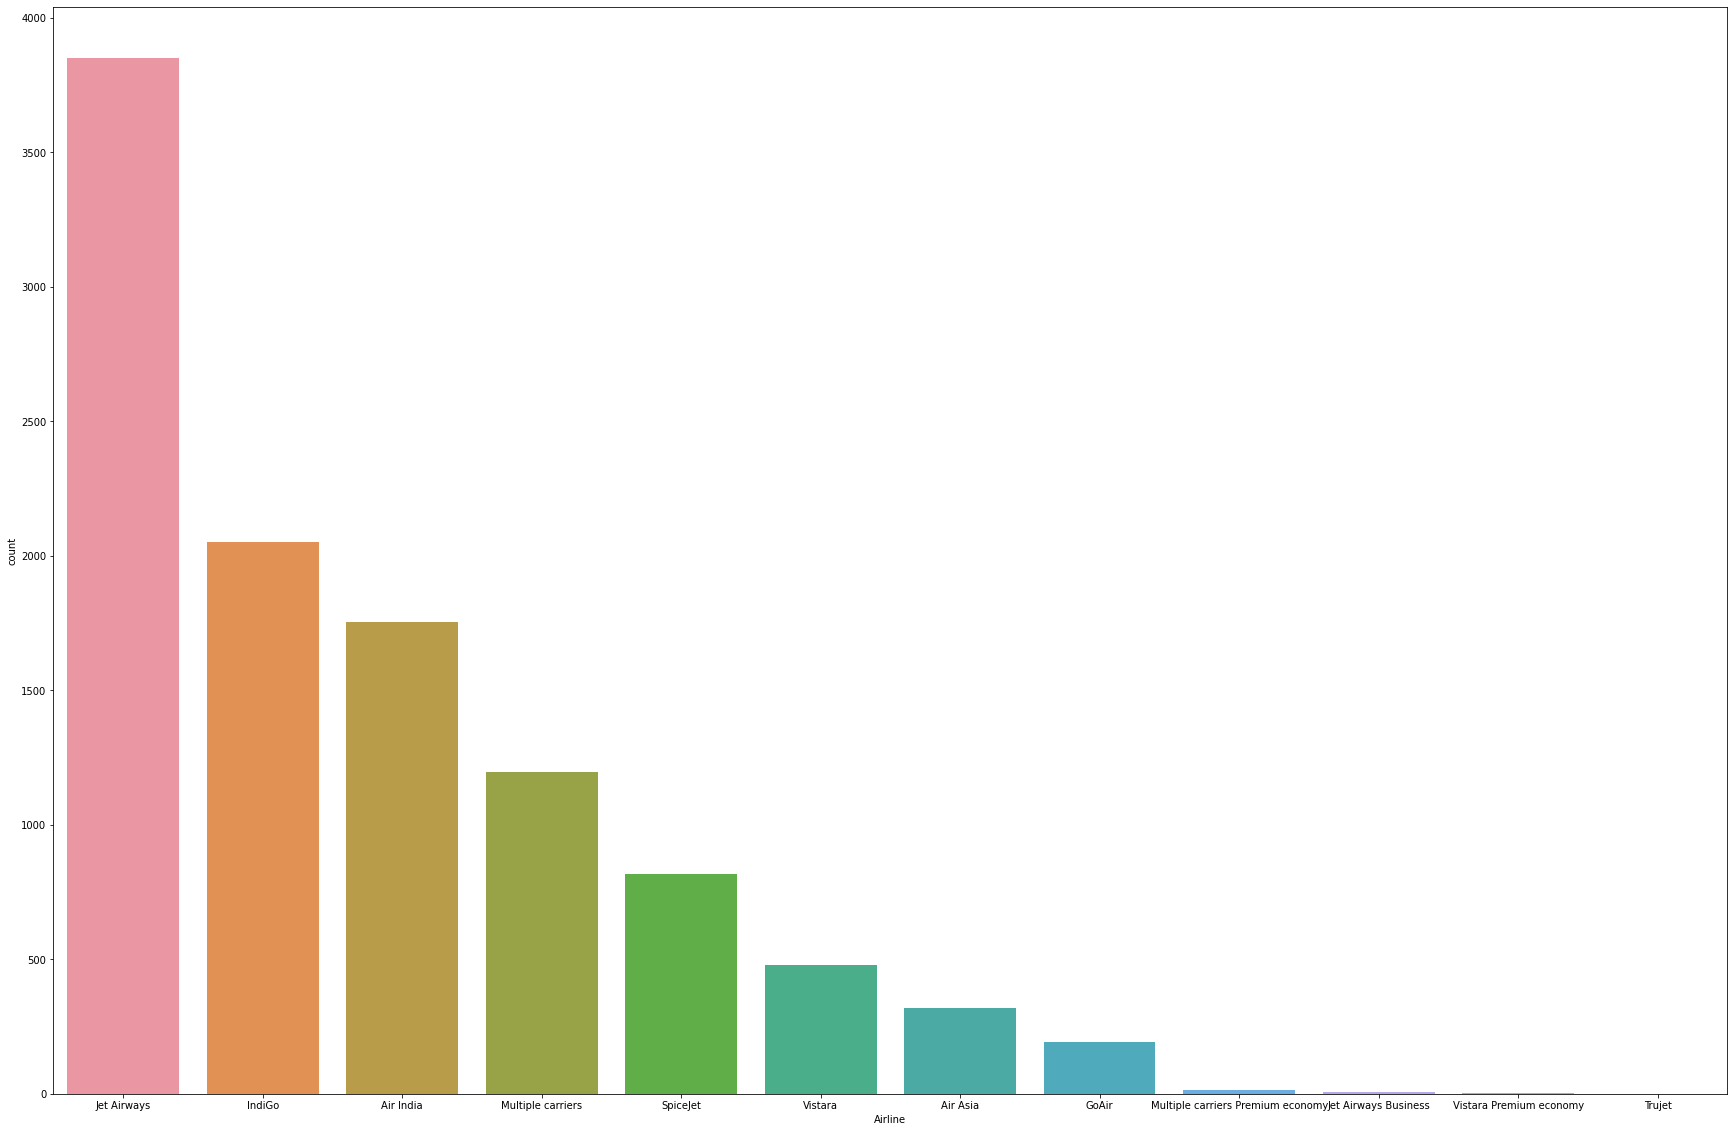

In [151]:
plt.figure(figsize = (30,20))
sns.countplot(x='Airline',data =df,order = df['Airline'].value_counts(ascending=False).index)
plt.show()

Jet Airways are most preferred airlines

### 2. Mean/Median price for which airline is highest and lowest.

In [152]:
mean = df.groupby('Airline')['Price'].aggregate(np.mean)
median = df.groupby('Airline')['Price'].aggregate(np.median)
Airline_mean = pd.DataFrame(mean)
Airline_median = pd.DataFrame(median)
Airline_mean.rename(columns = {'Price':'Mean'}, inplace = True)
Airline_median.rename(columns = {'Price':'Median'}, inplace = True)

In [153]:
Airline_mean.sort_values(by=['Mean'],ascending = False)

,Mean
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9611.210616
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


In [154]:
Airline_median.sort_values(by=['Median'],ascending = False)

,Median
Airline,
Jet Airways Business,54747.0
Jet Airways,11467.0
Multiple carriers Premium economy,11269.0
Multiple carriers,10197.0
Air India,9443.0
Vistara Premium economy,9125.0
Vistara,7980.0
Air Asia,5162.0
GoAir,5135.0


In [155]:
pd.merge(Airline_mean,Airline_median,on = 'Airline')

,Mean,Median
Airline,,
Air Asia,5590.260188,5162.0
Air India,9611.210616,9443.0
GoAir,5861.056701,5135.0
IndiGo,5673.682903,5000.0
Jet Airways,11643.923357,11467.0
Jet Airways Business,58358.666667,54747.0
Multiple carriers,10902.678094,10197.0
Multiple carriers Premium economy,11418.846154,11269.0
SpiceJet,4338.284841,3873.0


* For Mean
    * Air Asia is the Highest mean Airline with 5590.2601
    * Vistara Premium economy is the lowest mean airline with 8962.333333
* For Median
    * Jet Airways Business	54747.0 is the maximum median airline
    * SpiceJet	3873.0 is minimum median airline

### 3. For each flight which is the most common source and destination airport

In [156]:
a = df.groupby('Airline')['Source','Destination'].value_counts(ascending = False)
pd.DataFrame(a)

<ipython-input-156-89667dd37ecf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby('Airline')['Source','Destination'].value_counts(ascending = False)


0
Airline                           Source   Destination      
Air Asia                          Kolkata  Banglore      150
                                  Delhi    Cochin         80
                                  Banglore Delhi          71
                                           New Delhi      18
Air India                         Delhi    Cochin        747
                                  Kolkata  Banglore      512
                                  Banglore New Delhi     212
                                  Mumbai   Hyderabad     136
                                  Banglore Delhi         120
                                  Chennai  Kolkata        25
GoAir                             Delhi    Cochin         76
                                  Banglore Delhi          69
                                  Kolkata  Banglore       25
                                  Banglore New Delhi      24
IndiGo                            Delhi    Cochin        705
                                  Kolkata  Banglore      445
                                  Banglore Delhi         366
                                  Mumbai   Hyderabad     196
                                  Chennai  Kolkata       184
                                  Banglore New Delhi     157
Jet Airways                       Delhi    Cochin       1586
                                  Kolkata  Banglore     1256
                                  Banglore New Delhi     418
                                           Delhi         370
                                  Mumbai   Hyderabad     219
Jet Airways Business              Banglore New Delhi       4
                                  Delhi    Cochin          2
Multiple carriers                 Delhi    Cochin       1196
Multiple carriers Premium economy Delhi    Cochin         13
SpiceJet                          Kolkata  Banglore      300
                                  Banglore Delhi         137
                                  Chennai  Kolkata       128
                                  Mumbai   Hyderabad     122
                                  Delhi    Cochin         87
                                  Banglore New Delhi      44
Trujet                            Mumbai   Hyderabad       1
Vistara                           Kolkata  Banglore      183
                                  Banglore Delhi         131
                                           New Delhi      54
                                  Delhi    Cochin         45
                                  Chennai  Kolkata        43
                                  Mumbai   Hyderabad      23
Vistara Premium economy           Banglore Delhi           1
                                           New Delhi       1
                                  Chennai  Kolkata         1

### 4. How many flights are going from each source airports and destination airport.

In [157]:
b = df.groupby(['Source','Destination'])['Airline'].value_counts(ascending = False)
d=pd.DataFrame(b)

In [158]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### 5. Which airline is having most non-stop flight.

In [159]:
bool = df['Total_Stops'] == 'non-stop'

In [160]:
df['Airline'][bool].value_counts()

IndiGo                     1241
SpiceJet                    670
Jet Airways                 623
Air India                   417
Vistara                     264
Air Asia                    181
GoAir                        92
Vistara Premium economy       3
Name: Airline, dtype: int64

In [161]:
df.groupby('Airline')['Total_Stops'].value_counts(ascending = False)

Airline                            Total_Stops
Air Asia                           non-stop        181
                                   1 stop          129
                                   2 stops           9
Air India                          2 stops         756
                                   1 stop          540
                                   non-stop        417
                                   3 stops          37
                                   4 stops           1
GoAir                              1 stop          102
                                   non-stop         92
IndiGo                             non-stop       1241
                                   1 stop          793
                                   2 stops          19
Jet Airways                        1 stop         2535
                                   2 stops         691
                                   non-stop        623
Jet Airways Business               1 stop            4
                  

### Which day of week we have maximum and minimum flights?

In [162]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Sanity Check

* check for duplicate data
* Date of Jorney is object need to be converted into Datetime.
* Dep_Time is fine.
* Arrival Time is incorrectly placed so need to fixed.
* Duration is available in HH:MM format need to be either in minutes or hours. checked
* Total_Stops should be numerical but right it is object.
* Check if Additional_Info column provides any meaning information or not.

### Remove Duplicates

In [163]:
df.drop_duplicates(inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


### Action on Sanity

Rather than apply the code on sanity we can make the common and single code and use it as a function.

In [165]:
def time_min(duration):
    dur = duration.split()
    min = 0
    for i in dur:
        if i[-1] == 'h':
            min = min + int(i[:-1])*60
        if i[-1] == 'm':
            min = min + int(int(i[:-1]))
    return min

def create_preprocess_date_time(df):
    '''
    This Function preprocess date_of_journey and duration to create departure and arrival date time.
    '''
    df['DepartureDateTime'] = df['Date_of_Journey'] + " "+ df['Dep_Time']
    df['DepartureDateTime'] = pd.to_datetime(df['DepartureDateTime'],infer_datetime_format=True)
    df['Duration_min'] = df['Duration'].apply(lambda x: time_min(x))
    df['Duration_timedelta'] = pd.to_timedelta(df['Duration_min'], unit='m')
    df["ArrivalDateTime"] = df['DepartureDateTime'] + df['Duration_timedelta']
    return df

create_preprocess_date_time(df)


# we create as function for all steps


## Running the process of prediction is also referred as inference:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00


In [166]:
def sanity_check(df,train=True):
    '''
    This function performs sanity check on the airline data.
    inputs:
        df: dataframe that we need to perform sanity check
        train: This is used for process of training and inference.
            train is having default value of True and can be set as False if we are running inference.
            
        ## process for training    
        sanity_check(df,train = True)
        # process of prediction
        sanity_check(df,train=False)
    returns:
        df
    '''
    if train:
        df.drop_duplicates(inplace=True)
    
    stops_dict = {
    'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4
    }
    create_preprocess_date_time(df)
    df['Total_Stops'] = df['Total_Stops'].replace(stops_dict)
    return df
    
## process for training    
sanity_check(df)
# process of prediction
sanity_check(df,train=False)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00


#### Check Additional information 

In [167]:
df['Additional_Info'].value_counts()/len(df)*100

No info                         78.208927
In-flight meal not included     18.407722
No check-in baggage included     3.039281
1 Long layover                   0.181592
Change airports                  0.066902
Business class                   0.038230
No Info                          0.028672
1 Short layover                  0.009557
Red-eye flight                   0.009557
2 Long layover                   0.009557
Name: Additional_Info, dtype: float64

### Combine Function of Sanity Check Code

In [168]:
def time_min(duration):
    dur = duration.split()
    min = 0
    for i in dur:
        if i[-1] == 'h':
            min = min + int(i[:-1])*60
        if i[-1] == 'm':
            min = min + int(int(i[:-1]))
    return min

def create_preprocess_date_time(df):
    '''
    This Function preprocess date_of_journey and duration to create departure and arrival date time.
    '''
    df['DepartureDateTime'] = df['Date_of_Journey'] + " "+ df['Dep_Time']
    df['DepartureDateTime'] = pd.to_datetime(df['DepartureDateTime'],infer_datetime_format=True)
    df['Duration_min'] = df['Duration'].apply(lambda x: time_min(x))
    df['Duration_timedelta'] = pd.to_timedelta(df['Duration_min'], unit='m')
    df["ArrivalDateTime"] = df['DepartureDateTime'] + df['Duration_timedelta']
    return df

create_preprocess_date_time(df)


def sanity_check(df,train=True):
    '''
    This function performs sanity check on the airline data.
    inputs:
        df: dataframe that we need to perform sanity check
        train: This is used for process of training and inference.
            train is having default value of True and can be set as False if we are running inference.
            
        ## process for training    
        sanity_check(df,train = True)
        # process of prediction
        sanity_check(df,train=False)
    returns:
        df
    '''
    if train:
        df.drop_duplicates(inplace=True)
    
    stops_dict = {
    'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4
    }
    create_preprocess_date_time(df)
    df['Total_Stops'] = df['Total_Stops'].replace(stops_dict)
    return df
    
## process for training    
sanity_check(df)
# process of prediction
sanity_check(df,train=False)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00


In [169]:
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

# Missing value Handling

Finding the Null Value and Handling

In [170]:
# Find null value
df.isnull().sum()/len(df)*100

Airline               0.000000
Source                0.000000
Destination           0.000000
Route                 0.009557
Total_Stops           0.009557
Price                 0.000000
DepartureDateTime     0.000000
Duration_min          0.000000
Duration_timedelta    0.000000
ArrivalDateTime       0.000000
dtype: float64

In [171]:
def handle_missing_value(df,train=True):
    """
    This function helps to handle missing value.
    Since for Airline data there is just one missing value we can choose to drop missing value.
    inputs:
         df: dataframe which requires imputation.
         
    returns:
        df
    
    """
    df.dropna(inplace=True)
    return df
# For training
handle_missing_value(df)

,Airline,Source,Destination,Route,Total_Stops,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00


In [172]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops           0
Price                 0
DepartureDateTime     0
Duration_min          0
Duration_timedelta    0
ArrivalDateTime       0
dtype: int64

# Handling Categorical Values

In [173]:
df['Destination'] = df['Destination'].replace({'New Delhi':'Delhi'})

In [174]:
# To get unique value of all categorical column

In [175]:
column = ['Airline','Source', 'Destination', 'Route']
for col in column:
    print("Name : ",col)
    print("The unique value for {} are ".format(col))
    print("The Unique value Count are {} ".format(df[col].unique()))
    print("The Unique value Count are {} ".format(len(df[col].unique())))
    print(" - "*30)

Name :  Airline
The unique value for Airline are 
The Unique value Count are ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet'] 
The Unique value Count are 12 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Name :  Source
The unique value for Source are 
The Unique value Count are ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai'] 
The Unique value Count are 5 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Name :  Destination
The unique value for Destination are 
The Unique value Count are ['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad'] 
The Unique value Count are 5 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Name :  Route
The unique value for Route are 
The Unique value Count are ['BLR → DEL' 'CCU → IXR → BB

### Frequency Encoding

In [176]:
col = 'Airline'
df.groupby(col).size()

Airline
Air Asia                              319
Air India                            1694
GoAir                                 194
IndiGo                               2043
Jet Airways                          3700
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              815
Trujet                                  1
Vistara                               478
Vistara Premium economy                 3
dtype: int64

In [177]:
freq_value = df.groupby(col).size()/len(df)

freq_value

Airline
Air Asia                             0.030491
Air India                            0.161919
GoAir                                0.018543
IndiGo                               0.195278
Jet Airways                          0.353661
Jet Airways Business                 0.000574
Multiple carriers                    0.114318
Multiple carriers Premium economy    0.001243
SpiceJet                             0.077901
Trujet                               0.000096
Vistara                              0.045689
Vistara Premium economy              0.000287
dtype: float64

In [178]:
freq_dict = freq_value.to_dict()

In [179]:
freq_dict

{'Air Asia': 0.030491301854329956,
 'Air India': 0.1619193270885108,
 'GoAir': 0.018543299560313517,
 'IndiGo': 0.1952781494934047,
 'Jet Airways': 0.35366086790288664,
 'Jet Airways Business': 0.0005735041101127892,
 'Multiple carriers': 0.1143184859491493,
 'Multiple carriers Premium economy': 0.0012425922385777097,
 'SpiceJet': 0.0779009749569872,
 'Trujet': 9.558401835213153e-05,
 'Vistara': 0.04568916077231887,
 'Vistara Premium economy': 0.0002867520550563946}

In [180]:
def frequency_encoder(df,col):
    """
    This function encodes a categorical column based on the frequency of their occurence.
    input:
        df : Input DataFrame in which encoding has to be created 
        col : Column name which has to be encoded
    return: 
          frequency encoded dictionary for columns
    """
    freq_value = df.groupby(col).size()/len(df)
    freq_dict = freq_value.to_dict()
    df["Freq_encoded_"+col] = df[col].replace(freq_dict)
    return freq_dict

In [181]:
frequency_encoder(df,col)

{'Air Asia': 0.030491301854329956,
 'Air India': 0.1619193270885108,
 'GoAir': 0.018543299560313517,
 'IndiGo': 0.1952781494934047,
 'Jet Airways': 0.35366086790288664,
 'Jet Airways Business': 0.0005735041101127892,
 'Multiple carriers': 0.1143184859491493,
 'Multiple carriers Premium economy': 0.0012425922385777097,
 'SpiceJet': 0.0779009749569872,
 'Trujet': 9.558401835213153e-05,
 'Vistara': 0.04568916077231887,
 'Vistara Premium economy': 0.0002867520550563946}

### Mean Encoding

In [182]:
col = 'Airline'
target_col = 'Price'

In [183]:
def mean_encoder(df,col,target_col):
    """
    This function encodes a categorical column based on the frequency of their occurence.
    input:
        df : Input DataFrame in which encoding has to be created 
        col : Column name which has to be encoded
    return: 
          Mean encoded dict for column
    """
    mean_value = df.groupby(col)[target_col].mean()
    mean_dict = mean_value.to_dict()
    df["Mean_encoded_"+col] = df[col].replace(mean_dict)
    return mean_dict
mean_encoder(df,col,target_col)

{'Air Asia': 5590.260188087775,
 'Air India': 9556.6080283353,
 'GoAir': 5861.056701030928,
 'IndiGo': 5668.469897209985,
 'Jet Airways': 11599.02108108108,
 'Jet Airways Business': 58358.666666666664,
 'Multiple carriers': 10902.678093645485,
 'Multiple carriers Premium economy': 11418.846153846154,
 'SpiceJet': 4335.841717791411,
 'Trujet': 4140.0,
 'Vistara': 7801.355648535565,
 'Vistara Premium economy': 8962.333333333334}

In [184]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime,Freq_encoded_Airline,Mean_encoded_Airline
0,IndiGo,Banglore,Delhi,BLR → DEL,0.0,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00,0.195278,5668.469897


### Label encoder

In [185]:
## Label encoder for function and later usages:

## Applying Label Encoder to Categorical columns as Hit and Trail.
from sklearn.preprocessing import LabelEncoder

def label_encoder(df,col):
    """
    This function encodes a categorical column based on the basis of their order label.
    input:
        df : Input DataFrame in which encoding has to be created 
        col : Column name which has to be encoded
    return: 
          label encoded dict for column
    """
    le = LabelEncoder()
    le.fit(df[col])
    label_dict = dict(zip((le.classes_),le.transform(le.classes_)))
    df["Label_encoded_"+col] = df[col].replace(label_dict)
    return label_dict

In [186]:
label_encoder(df,col)

{'Air Asia': 0,
 'Air India': 1,
 'GoAir': 2,
 'IndiGo': 3,
 'Jet Airways': 4,
 'Jet Airways Business': 5,
 'Multiple carriers': 6,
 'Multiple carriers Premium economy': 7,
 'SpiceJet': 8,
 'Trujet': 9,
 'Vistara': 10,
 'Vistara Premium economy': 11}

In [187]:
df

,Airline,Source,Destination,Route,Total_Stops,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline
0,IndiGo,Banglore,Delhi,BLR → DEL,0.0,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00,0.195278,5668.469897,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00,0.161919,9556.608028,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00,0.353661,11599.021081,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00,0.195278,5668.469897,3
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1.0,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00,0.195278,5668.469897,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00,0.030491,5590.260188,0
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00,0.161919,9556.608028,1
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00,0.353661,11599.021081,4
10681,Vistara,Banglore,Delhi,BLR → DEL,0.0,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00,0.045689,7801.355649,10


### Applying all encoding on Dataframe

In [188]:
df.select_dtypes(object).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

In [189]:
## Create a function to handle categorical value
def handle_categorical_values(df,target):
    '''
      This function handles categorical value and create a dataframe.
      Input:
        df : Dataframe which require categorical value treatment
      returns :
         Dataframe with all categorical value handled.
    '''
    encoded_dict = {}
    # Getting all object columns
    object_columns = df.select_dtypes(object).columns

    ## generate frequency encoded categorical values
    frequency_encoded_dict ={} 
    for col in object_columns:
        freq_dict = frequency_encoder(df,col)
        frequency_encoded_dict[col] = freq_dict

    ## generate target mean encoded categorical values
    mean_encoded_dict ={} 
    for col in object_columns:
        mean_dict = mean_encoder(df,col,target)
        mean_encoded_dict[col] = mean_dict

    
    ## generate label encoded categorical values
    label_encoded_dict ={} 
    for col in object_columns:
        label_dict = label_encoder(df,col)
        label_encoded_dict[col] = label_dict
    
    encoded_dict["Frequency"] = frequency_encoded_dict
    encoded_dict["Mean"] = mean_encoded_dict
    encoded_dict["Label"] = label_encoded_dict

    return df, encoded_dict

In [190]:
target = 'Price'
df, encoded_dict = handle_categorical_values(df,target)

In [191]:
df

,Airline,Source,Destination,Route,Total_Stops,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime,...,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route
0,IndiGo,Banglore,Delhi,BLR → DEL,0.0,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00,...,3,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00,...,1,0.273370,0.273370,0.000574,9143.083566,9143.083566,7369.166667,3,0,84
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00,...,4,0.415313,0.415313,0.003919,10461.600690,10461.600690,13277.195122,2,1,118
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00,...,3,0.273370,0.273370,0.000860,9143.083566,9143.083566,6279.333333,3,0,91
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1.0,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00,...,3,0.208278,0.208278,0.000287,8022.872877,8022.872877,11313.000000,0,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00,...,0,0.273370,0.273370,0.069203,9143.083566,9143.083566,4556.055249,3,0,64
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00,...,1,0.273370,0.273370,0.069203,9143.083566,9143.083566,4556.055249,3,0,64
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00,...,4,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18
10681,Vistara,Banglore,Delhi,BLR → DEL,0.0,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00,...,10,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18


In [192]:
df

,Airline,Source,Destination,Route,Total_Stops,Price,DepartureDateTime,Duration_min,Duration_timedelta,ArrivalDateTime,...,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route
0,IndiGo,Banglore,Delhi,BLR → DEL,0.0,3897,2019-03-24 22:20:00,170,0 days 02:50:00,2019-03-25 01:10:00,...,3,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,7662,2019-05-01 05:50:00,445,0 days 07:25:00,2019-05-01 13:15:00,...,1,0.273370,0.273370,0.000574,9143.083566,9143.083566,7369.166667,3,0,84
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,13882,2019-06-09 09:25:00,1140,0 days 19:00:00,2019-06-10 04:25:00,...,4,0.415313,0.415313,0.003919,10461.600690,10461.600690,13277.195122,2,1,118
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,6218,2019-05-12 18:05:00,325,0 days 05:25:00,2019-05-12 23:30:00,...,3,0.273370,0.273370,0.000860,9143.083566,9143.083566,6279.333333,3,0,91
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1.0,13302,2019-03-01 16:50:00,285,0 days 04:45:00,2019-03-01 21:35:00,...,3,0.208278,0.208278,0.000287,8022.872877,8022.872877,11313.000000,0,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,4107,2019-04-09 19:55:00,150,0 days 02:30:00,2019-04-09 22:25:00,...,0,0.273370,0.273370,0.069203,9143.083566,9143.083566,4556.055249,3,0,64
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,4145,2019-04-27 20:45:00,155,0 days 02:35:00,2019-04-27 23:20:00,...,1,0.273370,0.273370,0.069203,9143.083566,9143.083566,4556.055249,3,0,64
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,7229,2019-04-27 08:20:00,180,0 days 03:00:00,2019-04-27 11:20:00,...,4,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18
10681,Vistara,Banglore,Delhi,BLR → DEL,0.0,12648,2019-03-01 11:30:00,160,0 days 02:40:00,2019-03-01 14:10:00,...,10,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18


### Combine all the code of Categorical Values

In [193]:
### Combine all the code of Categorical Values

def frequency_encoder(df,col):
    """
    This function encodes a categorical column based on the frequency of their occurence.
    input:
        df : Input DataFrame in which encoding has to be created 
        col : Column name which has to be encoded
    return: 
          frequency encoded dictionary for columns
    """
    freq_value = df.groupby(col).size()/len(df)
    freq_dict = freq_value.to_dict()
    df["Freq_encoded_"+col] = df[col].replace(freq_dict)
    return freq_dict


def mean_encoder(df,col,target_col):
    """
    This function encodes a categorical column based on the frequency of their occurence.
    input:
        df : Input DataFrame in which encoding has to be created 
        col : Column name which has to be encoded
    return: 
          Mean encoded dict for column
    """
    mean_value = df.groupby(col)[target_col].mean()
    mean_dict = mean_value.to_dict()
    df["Mean_encoded_"+col] = df[col].replace(mean_dict)
    return mean_dict
mean_encoder(df,col,target_col)



from sklearn.preprocessing import LabelEncoder

def label_encoder(df,col):
    """
    This function encodes a categorical column based on the basis of their order label.
    input:
        df : Input DataFrame in which encoding has to be created 
        col : Column name which has to be encoded
    return: 
          label encoded dict for column
    """
    le = LabelEncoder()
    le.fit(df[col])
    label_dict = dict(zip((le.classes_),le.transform(le.classes_)))
    df["Label_encoded_"+col] = df[col].replace(label_dict)
    return label_dict


## Create a function to handle categorical value
def handle_categorical_values(df,target):
    '''
      This function handles categorical value and create a dataframe.
      Input:
        df : Dataframe which require categorical value treatment
      returns :
         Dataframe with all categorical value handled.
    '''
    encoded_dict = {}
    # Getting all object columns
    object_columns = df.select_dtypes(object).columns

    ## generate frequency encoded categorical values
    frequency_encoded_dict ={} 
    for col in object_columns:
        freq_dict = frequency_encoder(df,col)
        frequency_encoded_dict[col] = freq_dict

    ## generate target mean encoded categorical values
    mean_encoded_dict ={} 
    for col in object_columns:
        mean_dict = mean_encoder(df,col,target)
        mean_encoded_dict[col] = mean_dict

    
    ## generate label encoded categorical values
    label_encoded_dict ={} 
    for col in object_columns:
        label_dict = label_encoder(df,col)
        label_encoded_dict[col] = label_dict
    
    encoded_dict["Frequency"] = frequency_encoded_dict
    encoded_dict["Mean"] = mean_encoded_dict
    encoded_dict["Label"] = label_encoded_dict

    return df, encoded_dict


def airline_handle_categorical_data(df,target):
    df['Destination'] = df['Destination'].replace({'New Delhi':'Delhi'})
    df, encoded_dict = handle_categorical_values(df,target)
    categorical_cols = df.select_dtypes(object).columns
    df.drop(columns=categorical_cols,inplace=True)
    return df, encoded_dict

df, encoded_dict = airline_handle_categorical_data(df,'Price')

### Correlation

In [194]:
df.corr()

<ipython-input-194-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total_Stops,Price,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route
Total_Stops,1.000000,0.602013,0.727982,0.211803,0.421327,-0.194549,0.571402,0.571402,-0.205605,0.559200,0.559200,0.806690,0.194203,-0.422656,0.441347
Price,0.602013,1.000000,0.501758,0.371620,0.638674,-0.036491,0.350997,0.350997,0.038912,0.359938,0.359938,0.746275,0.013796,-0.260751,0.154374
Duration_min,0.727982,0.501758,1.000000,0.289457,0.433989,-0.153618,0.400039,0.400039,-0.111065,0.414954,0.414954,0.671871,0.162808,-0.383773,0.273200
Freq_encoded_Airline,0.211803,0.371620,0.289457,1.000000,0.581861,-0.200348,0.038026,0.038026,0.019636,0.056089,0.056089,0.367567,0.055926,-0.107401,-0.065789
Mean_encoded_Airline,0.421327,0.638674,0.433989,0.581861,1.000000,-0.057135,0.258498,0.258498,0.158467,0.257259,0.257259,0.572144,0.047805,-0.183451,0.071608
Label_encoded_Airline,-0.194549,-0.036491,-0.153618,-0.200348,-0.057135,1.000000,-0.049748,-0.049748,0.194054,-0.059864,-0.059864,-0.058168,-0.012172,0.068634,0.029636
Freq_encoded_Source,0.571402,0.350997,0.400039,0.038026,0.258498,-0.049748,1.000000,1.000000,0.303115,0.975159,0.975159,0.470332,0.066914,-0.596026,0.612054
Freq_encoded_Destination,0.571402,0.350997,0.400039,0.038026,0.258498,-0.049748,1.000000,1.000000,0.303115,0.975159,0.975159,0.470332,0.066914,-0.596026,0.612054
Freq_encoded_Route,-0.205605,0.038912,-0.111065,0.019636,0.158467,0.194054,0.303115,0.303115,1.000000,0.272478,0.272478,0.052142,-0.196373,-0.001272,0.055678
Mean_encoded_Source,0.559200,0.359938,0.414954,0.056089,0.257259,-0.059864,0.975159,0.975159,0.272478,1.000000,1.000000,0.482313,0.038329,-0.724431,0.496810


## Model Building

In [195]:
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import SplineTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def regression(X_train, X_test, y_train, y_test):
    ## Baseline model
    reg = linear_model.LinearRegression()
    reg.fit(X_train,y_train)
    print(metrics.r2_score(y_train,reg.predict(X_train)), metrics.r2_score(y_test,reg.predict(X_test)))
    return reg

def knearestneighbour(X_train, X_test, y_train, y_test):
    knn_regressor = KNeighborsRegressor(n_neighbors=10)
    knn_regressor.fit(X_train, y_train)
    print(metrics.r2_score(y_train,knn_regressor.predict(X_train)),metrics.r2_score(y_test,knn_regressor.predict(X_test)))
    return knn_regressor

def decisiontree(X_train, X_test, y_train, y_test):
    tree = DecisionTreeRegressor(max_depth=10)
    tree.fit(X_train,y_train)
    print(metrics.r2_score(y_train,tree.predict(X_train)),metrics.r2_score(y_test,tree.predict(X_test)))
    return tree

def randomForest(X_train, X_test, y_train, y_test):
    random_regressor = RandomForestRegressor(n_estimators=500, min_samples_split=10,min_samples_leaf=2)
    random_regressor.fit(X_train, y_train)
    print(metrics.r2_score(y_train,random_regressor.predict(X_train)),metrics.r2_score(y_test,random_regressor.predict(X_test)))
    return random_regressor

from xgboost import XGBRegressor
def xgboost(X_train, X_test, y_train, y_test):
    xgboost_regressor = XGBRegressor()
    xgboost_regressor.fit(X_train, y_train)
    print(metrics.r2_score(y_train,xgboost_regressor.predict(X_train)),metrics.r2_score(y_test,xgboost_regressor.predict(X_test)))
    return xgboost_regressor

from catboost import  CatBoostRegressor
def catboost(X_train, X_test, y_train, y_test):
    catboost_regressor = CatBoostRegressor(verbose=False)
    catboost_regressor.fit(X_train, y_train)
    print(metrics.r2_score(y_train,catboost_regressor.predict(X_train)),metrics.r2_score(y_test,catboost_regressor.predict(X_test)))
    return catboost_regressor

from sklearn.ensemble import GradientBoostingRegressor
def gboost(X_train, X_test, y_train, y_test):
    gboost_regressor = GradientBoostingRegressor()
    gboost_regressor.fit(X_train, y_train)
    print(metrics.r2_score(y_train,gboost_regressor.predict(X_train)),metrics.r2_score(y_test,gboost_regressor.predict(X_test)))
    return gboost_regressor


def train(X,y,modelType):
    # Split your dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = modelType(X_train, X_test, y_train, y_test)
    return model

In [196]:
X = df.drop(columns=['Price','DepartureDateTime','Duration_timedelta','ArrivalDateTime'])
y = df['Price']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print(metrics.r2_score(y_train,reg.predict(X_train)), metrics.r2_score(y_test,reg.predict(X_test)))                                                    

0.6334767158700465 0.61904072499207


In [198]:
train(X,y,regression)

0.6334767158700465 0.61904072499207


LinearRegression()

In [199]:
train(X,y,knearestneighbour)

0.6891587105979624 0.6326587229158694


KNeighborsRegressor(n_neighbors=10)

In [200]:
train(X,y,decisiontree)

0.7132738528455688 0.6306830324209429


DecisionTreeRegressor(max_depth=10)

In [201]:
train(X,y,randomForest)

0.7358899555472378 0.6425322167481717


RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=500)

In [202]:
train(X,y,xgboost)

0.7522506912631617 0.6270171749071364


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [203]:
train(X,y,gboost)

0.6835166496109661 0.6472940559970097


GradientBoostingRegressor()

## VIF: Visual Inflation Factor

In [204]:
## Convert all data into numerical form to obtain your baseline model.

In [205]:
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs,data):
    
    vif_dict,tolerance_dict = {},{}
    
    for exog in exogs:
        no_exogs= [i for i in exogs if i != exog]
        X,y = data[no_exogs],data[exog]
    
        r_squared = LinearRegression().fit(X,y).score(X,y)
        
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif
        
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance
        
    dt_vif = pd.DataFrame({'VIF':vif_dict,'Tolerance':tolerance})
    return dt_vif   

In [206]:
sklearn_vif(exogs = X.columns,data =X).sort_values(by='VIF',ascending=False)

<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)


,VIF,Tolerance
Freq_encoded_Destination,inf,0.018575
Freq_encoded_Source,inf,0.018575
Mean_encoded_Destination,inf,0.018575
Mean_encoded_Source,inf,0.018575
Label_encoded_Destination,6.550988e+04,0.018575
Label_encoded_Source,1.463157e+04,0.018575
Label_encoded_Route,5.383465e+01,0.018575
Total_Stops,8.105551e+00,0.018575
Mean_encoded_Route,6.026433e+00,0.018575
Duration_min,2.349205e+00,0.018575


In [207]:
vif_col = ['Total_Stops', 'Duration_min', 'Freq_encoded_Airline',
       'Mean_encoded_Airline', 'Label_encoded_Airline', 
           'Freq_encoded_Source',
       #'Freq_encoded_Destination',
        'Freq_encoded_Route', 
           #'Mean_encoded_Source',
       #'Mean_encoded_Destination', 
        'Mean_encoded_Route',
       'Label_encoded_Source', 'Label_encoded_Destination',
       'Label_encoded_Route']

# Now we will check all top columns one by one till will not getting  less vif column

sklearn_vif(exogs = vif_col,data =X).sort_values(by='VIF',ascending=False)

,VIF,Tolerance
Total_Stops,6.936320,0.301176
Freq_encoded_Source,5.917626,0.301176
Mean_encoded_Route,4.841500,0.301176
Label_encoded_Route,3.320321,0.301176
Label_encoded_Destination,3.302453,0.301176
Label_encoded_Source,2.452627,0.301176
Duration_min,2.348979,0.301176
Mean_encoded_Airline,2.072872,0.301176
Freq_encoded_Route,1.940591,0.301176
Freq_encoded_Airline,1.704650,0.301176


In [208]:
# still the model has same not much better performance we get.
# that means the columns that we had deleted not impact that much so we can go further wit those column
train(X[vif_col],y,regression)
train(X[vif_col],y,knearestneighbour)
train(X[vif_col],y,decisiontree)
train(X[vif_col],y,randomForest)
train(X[vif_col],y,xgboost)
train(X[vif_col],y,gboost)
#train(X[vif_col],y,catboost)

0.6332966514192129 0.6190857520128987
0.6901263709827972 0.6322774825953947
0.7132738528455688 0.6307803184957776
0.7359494622150073 0.6412153117531398
0.7522506912631617 0.6270171749071364
0.6835166496109661 0.6475445013571091


GradientBoostingRegressor()

## Scaling and outlier treatment

In [209]:
X = X[vif_col]

### 1.  Robust Scaler

In [210]:
from sklearn.preprocessing import RobustScaler

X_transform = RobustScaler().fit_transform(X)
X_transformed = pd.DataFrame(X_transform,columns = X.columns)

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)
train(X_transformed,y,randomForest)
train(X_transformed,y,xgboost)
train(X_transformed,y,gboost)

0.6332966514192129 0.6190857520128927
0.6833931651326812 0.6298425588036669
0.7132738528455688 0.6349779069815793
0.7356214165307737 0.6430368831885398
0.7522506912631617 0.6270169741947662
0.6835166496109661 0.6470724350234313


GradientBoostingRegressor()

we can see robust scaling is not doing better performance as much

In [211]:
df_transformed =X_transformed.copy(deep=True)
df_transformed['Price'] = y # columns create as price
df_transformed.corr()

,Total_Stops,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Route,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Price
Total_Stops,1.000000,0.727982,0.211803,0.421327,-0.194549,0.571402,-0.205605,0.806690,0.194203,-0.422656,0.441347,0.039017
Duration_min,0.727982,1.000000,0.289457,0.433989,-0.153618,0.400039,-0.111065,0.671871,0.162808,-0.383773,0.273200,0.027030
Freq_encoded_Airline,0.211803,0.289457,1.000000,0.581861,-0.200348,0.038026,0.019636,0.367567,0.055926,-0.107401,-0.065789,0.006926
Mean_encoded_Airline,0.421327,0.433989,0.581861,1.000000,-0.057135,0.258498,0.158467,0.572144,0.047805,-0.183451,0.071608,0.049989
Label_encoded_Airline,-0.194549,-0.153618,-0.200348,-0.057135,1.000000,-0.049748,0.194054,-0.058168,-0.012172,0.068634,0.029636,0.011536
Freq_encoded_Source,0.571402,0.400039,0.038026,0.258498,-0.049748,1.000000,0.303115,0.470332,0.066914,-0.596026,0.612054,0.039077
Freq_encoded_Route,-0.205605,-0.111065,0.019636,0.158467,0.194054,0.303115,1.000000,0.052142,-0.196373,-0.001272,0.055678,0.027073
Mean_encoded_Route,0.806690,0.671871,0.367567,0.572144,-0.058168,0.470332,0.052142,1.000000,0.018486,-0.349403,0.206860,0.054850
Label_encoded_Source,0.194203,0.162808,0.055926,0.047805,-0.012172,0.066914,-0.196373,0.018486,1.000000,-0.432609,0.403884,0.001868
Label_encoded_Destination,-0.422656,-0.383773,-0.107401,-0.183451,0.068634,-0.596026,-0.001272,-0.349403,-0.432609,1.000000,-0.229487,-0.023831


### 2. Power Transformer

In [212]:
from sklearn.preprocessing import PowerTransformer

X_transform = PowerTransformer().fit_transform(X)
X_transformed = pd.DataFrame(X_transform,columns = X.columns)

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)
train(X_transformed,y,randomForest)
train(X_transformed,y,xgboost)
train(X_transformed,y,gboost)

C:\Users\Eshaan\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


0.5615407049033123 0.5803469725247195
0.6703353379221828 0.6293081775128229
0.7139914559179268 0.6308158064052729
0.735687810946154 0.6437077678926775
0.7509530811963598 0.628082091709582
0.6813345459495482 0.6444458862034785


GradientBoostingRegressor()

* We can see some model has goes down his performance so we clearly don’t use this Transformation
* but we can use for some model which gives better result 0.7405383082830643 0.6266473788564882 so far

In [213]:
df_transformed = X_transformed.copy(deep = True)
df_transformed['Price'] = y
df_transformed.corr()

,Total_Stops,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Route,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Price
Total_Stops,1.000000,0.844850,0.226303,NaN,-0.154681,0.594835,-0.257056,0.844533,0.178948,-0.373699,0.458192,0.039913
Duration_min,0.844850,1.000000,0.291936,NaN,-0.108921,0.535225,-0.086790,0.819401,0.103656,-0.425656,0.352314,0.036260
Freq_encoded_Airline,0.226303,0.291936,1.000000,NaN,-0.081844,0.025808,0.029916,0.355888,0.058761,-0.097448,-0.060665,0.006537
Mean_encoded_Airline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Label_encoded_Airline,-0.154681,-0.108921,-0.081844,NaN,1.000000,-0.015420,0.251402,-0.017892,-0.010674,0.054979,0.042487,0.013280
Freq_encoded_Source,0.594835,0.535225,0.025808,NaN,-0.015420,1.000000,0.215073,0.490481,0.040707,-0.328968,0.687665,0.038186
Freq_encoded_Route,-0.257056,-0.086790,0.029916,NaN,0.251402,0.215073,1.000000,0.009358,-0.206968,0.087376,-0.032610,0.022537
Mean_encoded_Route,0.844533,0.819401,0.355888,NaN,-0.017892,0.490481,0.009358,1.000000,-0.005291,-0.296602,0.239712,0.054375
Label_encoded_Source,0.178948,0.103656,0.058761,NaN,-0.010674,0.040707,-0.206968,-0.005291,1.000000,-0.508930,0.342480,0.000447
Label_encoded_Destination,-0.373699,-0.425656,-0.097448,NaN,0.054979,-0.328968,0.087376,-0.296602,-0.508930,1.000000,-0.191226,-0.015926


### 3. Function Transformer

#### FunctionTransformer(np.log1p)

In [214]:
from sklearn.preprocessing import FunctionTransformer

X_transform = FunctionTransformer(np.log1p).fit_transform(X)
X_transformed = pd.DataFrame(X_transform,columns=X.columns)


train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)
train(X_transformed,y,randomForest)
train(X_transformed,y,xgboost)
train(X_transformed,y,gboost)

0.592717130855541 0.5958671491344739
0.6699874172870499 0.6274329302906541
0.7132738528455688 0.6342568998473666
0.7360208167671647 0.6439609177860348
0.7522506912631617 0.6270171749071364
0.6835166496109661 0.6464218599484981


GradientBoostingRegressor()

In [215]:
df_transformed = X_transformed.copy(deep = True)
df_transformed['Price'] = y
df_transformed.corr()

,Total_Stops,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Route,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Price
Total_Stops,1.000000,0.863786,0.232432,0.490239,-0.115757,0.615532,-0.146651,0.867788,0.313500,-0.378406,0.368466,0.626180
Duration_min,0.863786,1.000000,0.288951,0.544532,-0.084262,0.584356,-0.018656,0.850498,0.214511,-0.425020,0.273478,0.601974
Freq_encoded_Airline,0.232432,0.288951,1.000000,0.601074,0.035451,0.044400,0.019247,0.342026,0.045841,-0.096738,-0.076925,0.366855
Mean_encoded_Airline,0.490239,0.544532,0.601074,1.000000,0.004491,0.289999,0.163356,0.609313,0.082928,-0.137142,0.040957,0.610871
Label_encoded_Airline,-0.115757,-0.084262,0.035451,0.004491,1.000000,-0.016786,0.257797,0.013449,0.004276,0.057037,0.030229,0.034959
Freq_encoded_Source,0.615532,0.584356,0.044400,0.289999,-0.016786,1.000000,0.284566,0.563480,0.219333,-0.431073,0.502693,0.354439
Freq_encoded_Route,-0.146651,-0.018656,0.019247,0.163356,0.257797,0.284566,1.000000,0.096027,-0.150866,0.101184,0.048743,0.029534
Mean_encoded_Route,0.867788,0.850498,0.342026,0.609313,0.013449,0.563480,0.096027,1.000000,0.095484,-0.312079,0.137305,0.734900
Label_encoded_Source,0.313500,0.214511,0.045841,0.082928,0.004276,0.219333,-0.150866,0.095484,1.000000,-0.556682,0.738598,0.067974
Label_encoded_Destination,-0.378406,-0.425020,-0.096738,-0.137142,0.057037,-0.431073,0.101184,-0.312079,-0.556682,1.000000,-0.341735,-0.195564


#### FunctionTransformer(cube)

In [216]:
from sklearn.preprocessing import FunctionTransformer

def cube(X): return X**(0.333)

X_transform = FunctionTransformer(cube).fit_transform(X)
X_transformed = pd.DataFrame(X_transform,columns=X.columns)

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)
train(X_transformed,y,randomForest)
train(X_transformed,y,xgboost)
train(X_transformed,y,gboost)

0.6058911493540655 0.6030285078356927
0.6862846120786659 0.6362939130996079
0.7132738528455688 0.6322366419541358
0.7359574955583792 0.6424857420235032
0.7522506912631617 0.6270192418122551
0.6835166496109661 0.6463979564197881


GradientBoostingRegressor()

In [217]:
df_transformed = X_transformed.copy(deep = True)
df_transformed['Price'] = y
df_transformed.corr()

,Total_Stops,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Route,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Price
Total_Stops,1.000000,0.833065,0.239045,0.495621,-0.043271,0.621873,-0.232358,0.873024,0.363901,-0.273600,0.420080,0.628457
Duration_min,0.833065,1.000000,0.286370,0.527382,-0.067232,0.526672,-0.176549,0.799758,0.256528,-0.294052,0.297467,0.576777
Freq_encoded_Airline,0.239045,0.286370,1.000000,0.562445,0.077002,0.063097,0.027772,0.328025,0.049393,-0.072750,-0.035205,0.333373
Mean_encoded_Airline,0.495621,0.527382,0.562445,1.000000,0.059308,0.290668,0.107632,0.607769,0.086410,-0.069334,0.060645,0.621726
Label_encoded_Airline,-0.043271,-0.067232,0.077002,0.059308,1.000000,-0.036344,0.261455,0.034782,0.016958,0.065459,0.039893,0.054084
Freq_encoded_Source,0.621873,0.526672,0.063097,0.290668,-0.036344,1.000000,0.142225,0.541300,0.205377,-0.286197,0.418825,0.358264
Freq_encoded_Route,-0.232358,-0.176549,0.027772,0.107632,0.261455,0.142225,1.000000,-0.058498,-0.135131,0.135966,-0.040536,-0.067720
Mean_encoded_Route,0.873024,0.799758,0.328025,0.607769,0.034782,0.541300,-0.058498,1.000000,0.128585,-0.182592,0.175625,0.740985
Label_encoded_Source,0.363901,0.256528,0.049393,0.086410,0.016958,0.205377,-0.135131,0.128585,1.000000,-0.497611,0.790576,0.086664
Label_encoded_Destination,-0.273600,-0.294052,-0.072750,-0.069334,0.065459,-0.286197,0.135966,-0.182592,-0.497611,1.000000,-0.200193,-0.118911


* Till we donot get the result as we want to get.
* still one important method we will used

### 4. Polynominal Features method

In [218]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False,interaction_only=False)

X_transform = poly.fit_transform(X)
X_transformed = pd.DataFrame(X_transform,columns=poly.get_feature_names(X.columns))

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)
train(X_transformed,y,randomForest)
train(X_transformed,y,xgboost)
train(X_transformed,y,gboost)
#train(X_transformed,y,catboost)

C:\Users\Eshaan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.6656521878796782 0.6466279797188419
0.693882338484301 0.6309037059898774
0.7181320979275021 0.6166564234040905
0.7399639277362065 0.6429077083076971
0.7551481951752836 0.6230331285052565
0.6984709434592706 0.6533748092090341


GradientBoostingRegressor()

0.6652496523735875 0.6452740881617611 Linear regression model give the best performance compare to other

In [219]:
df_transformed =X_transformed.copy(deep=True)
df_transformed['Price'] = y
df_transformed.corr()

,Total_Stops,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Route,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,...,Mean_encoded_Route Label_encoded_Source,Mean_encoded_Route Label_encoded_Destination,Mean_encoded_Route Label_encoded_Route,Label_encoded_Source^2,Label_encoded_Source Label_encoded_Destination,Label_encoded_Source Label_encoded_Route,Label_encoded_Destination^2,Label_encoded_Destination Label_encoded_Route,Label_encoded_Route^2,Price
Total_Stops,1.000000,0.727982,0.211803,0.421327,-0.194549,0.571402,-0.205605,0.806690,0.194203,-0.422656,...,0.607235,0.054081,0.734205,0.012053,-0.166049,0.461468,-0.464628,-0.124019,0.424676,0.039017
Duration_min,0.727982,1.000000,0.289457,0.433989,-0.153618,0.400039,-0.111065,0.671871,0.162808,-0.383773,...,0.521619,-0.006052,0.529249,0.033718,-0.193404,0.325861,-0.389575,-0.165581,0.247025,0.027030
Freq_encoded_Airline,0.211803,0.289457,1.000000,0.581861,-0.200348,0.038026,0.019636,0.367567,0.055926,-0.107401,...,0.214538,0.059581,0.126333,0.062171,-0.037090,0.020606,-0.113188,-0.147209,-0.075729,0.006926
Mean_encoded_Airline,0.421327,0.433989,0.581861,1.000000,-0.057135,0.258498,0.158467,0.572144,0.047805,-0.183451,...,0.342013,0.111495,0.350518,-0.007029,-0.069993,0.116928,-0.243205,-0.157479,0.061268,0.049989
Label_encoded_Airline,-0.194549,-0.153618,-0.200348,-0.057135,1.000000,-0.049748,0.194054,-0.058168,-0.012172,0.068634,...,-0.025726,0.015757,-0.009444,-0.015523,0.031243,-0.009361,0.090632,0.101591,0.035101,0.011536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Label_encoded_Source Label_encoded_Route,0.461468,0.325861,0.020606,0.116928,-0.009361,0.509746,-0.081101,0.217280,0.832448,-0.525916,...,0.775827,-0.472870,0.724396,0.600611,0.234018,1.000000,-0.388180,0.099221,0.674208,0.015284
Label_encoded_Destination^2,-0.464628,-0.389575,-0.113188,-0.243205,0.090632,-0.757440,-0.140682,-0.415996,-0.222891,0.924745,...,-0.451417,0.537960,-0.405268,-0.056308,0.578380,-0.388180,1.000000,0.752854,-0.053974,-0.032532
Label_encoded_Destination Label_encoded_Route,-0.124019,-0.165581,-0.147209,-0.157479,0.101591,-0.201650,-0.019444,-0.204262,-0.075688,0.672339,...,-0.161235,0.396191,0.200734,-0.151155,0.476360,0.099221,0.752854,1.000000,0.603861,-0.016417
Label_encoded_Route^2,0.424676,0.247025,-0.075729,0.061268,0.035101,0.593103,0.057786,0.214802,0.211486,-0.082253,...,0.330495,-0.019305,0.805936,-0.092702,0.101252,0.674208,-0.053974,0.603861,1.000000,0.013501


Important Note :
* We can see we get the best performance model with use of Polynomial but we do not sure that it will give best result or not in future with some features.

* What we will do we go back and use those datetime columns as feature and try whether it will impact in model or not.

## Adding Basic Time Based Features

## I

In [220]:
# We will create function which gives the time of day in word based on time

In [221]:
def time_of_day(hr):
    '''
    This function gives the time of day based on logic:
        # 3-8 early_morning or 1
        # 8-12 morning or 2
        # 12-16 afternoon or 3
        # 16-20 evening or 4
        # 20-00 night or 5
        # 00-3 late_night or 6
        # invalid or 0
    input:
        hr
    return: tuple
        (timeOfDay,timeOfDay_encoded
    '''
    if hr in range(0,3) :
        str_val = 'late_night'
        val = 6
    elif hr in range(20,23):
        str_val = 'night'
        val = 5
    elif hr in range(16,20):
        str_val = 'evening'
        val = 4
    elif hr in range(12,16):
        str_val = 'after_noon'
        val = 3
    elif hr in range(8,12):
        str_val = 'morning'
        val = 2
    elif hr in range(3,8):
        str_val = 'early_morning'
        val = 1
    else:
        str_val = 'invalid'
        val = 0
    return (str_val, val)

            # 3-8 early_morning
            # 8-12 morning
            # 12-16 afternoon
            # 16-20 evening
            # 20-00 night
            # 00-3 late_night

In [222]:
df['dep_hr'] = df['DepartureDateTime'].dt.hour
df['arr_hr'] = df['ArrivalDateTime'].dt.hour

df['departure_timeOfDay'] = df['dep_hr'].apply(lambda x: time_of_day(x)[1])
df['arrival_timeOfDay'] = df['arr_hr'].apply(lambda x: time_of_day(x)[1])

In [223]:
X = df.drop(columns=['Price','DepartureDateTime','Duration_timedelta','ArrivalDateTime'])
y = df['Price']

In [224]:
train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)
train(X_transformed,y,randomForest)
train(X_transformed,y,xgboost)
train(X_transformed,y,gboost)

0.6656521878796782 0.6466279797188419
0.693882338484301 0.6309037059898774
0.7181320979275021 0.617019762429791
0.7404697720642135 0.6437334227770158
0.7551481951752836 0.6230331285052565
0.6984709434592705 0.653361036992391


GradientBoostingRegressor()

We can see the performance is still not good that much so we will work more on feature.

# II

#### Make a Feature based on Time of Day

In [225]:
def time_of_day(hr):
    '''
    This function gives the time of day based on logic:
        # 3-8 early_morning or 1
        # 8-12 morning or 2
        # 12-16 afternoon or 3
        # 16-20 evening or 4
        # 20-00 night or 5
        # 00-3 late_night or 6
        # invalid or 0
    input:
        hr
    return: tuple
        (timeOfDay,timeOfDay_encoded
    '''
    if hr in range(0,3) :
        str_val = 'late_night'
        val = 6
    elif hr in range(20,23):
        str_val = 'night'
        val = 5
    elif hr in range(16,20):
        str_val = 'evening'
        val = 4
    elif hr in range(12,26):
        str_val = 'after_noon'
        val = 3
    elif hr in range(8,12):
        str_val = 'morning'
        val = 2
    elif hr in range(3,8):
        str_val = 'early_morning'
        val = 1
    else:
        str_val = 'invalid'
        val = 0
    return (str_val, val)

        # 3-8 early_morning
        # 8-12 morning
        # 12-16 afternoon
        # 16-20 evening
        # 20-00 night
        # 00-3 late_night
        
df['dep_hr'] = df['DepartureDateTime'].dt.hour
df['arr_hr'] = df['ArrivalDateTime'].dt.hour

df['departure_timeOfDay'] = df['dep_hr'].apply(lambda x: time_of_day(x)[0])
df['arrival_timeOfDay'] = df['arr_hr'].apply(lambda x: time_of_day(x)[0])

df['departure_timeOfDay_encoded'] = df['dep_hr'].apply(lambda x: time_of_day(x)[1])
df['arrival_timeOfDay_encoded'] = df['arr_hr'].apply(lambda x: time_of_day(x)[1])


# One hot Encoding
df_onehot_col = ['departure_timeOfDay','arrival_timeOfDay']
df_onehot_encode = pd.get_dummies(df[df_onehot_col])
df_new = pd.concat([df,df_onehot_encode],axis = 1)
df_new.drop(columns=df_onehot_col,axis = 1,inplace = True)

In [226]:
X.head()

,Total_Stops,Duration_min,Freq_encoded_Airline,Mean_encoded_Airline,Label_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,dep_hr,arr_hr,departure_timeOfDay,arrival_timeOfDay
0,0.0,170,0.195278,5668.469897,3,0.208278,0.208278,0.146817,8022.872877,8022.872877,5552.235677,0,2,18,22,1,5,6
1,2.0,445,0.161919,9556.608028,1,0.273370,0.273370,0.000574,9143.083566,9143.083566,7369.166667,3,0,84,5,13,1,3
2,2.0,1140,0.353661,11599.021081,4,0.415313,0.415313,0.003919,10461.600690,10461.600690,13277.195122,2,1,118,9,4,2,1
3,1.0,325,0.195278,5668.469897,3,0.273370,0.273370,0.000860,9143.083566,9143.083566,6279.333333,3,0,91,18,23,4,0
4,1.0,285,0.195278,5668.469897,3,0.208278,0.208278,0.000287,8022.872877,8022.872877,11313.000000,0,2,29,16,21,4,5


### Let's See the Feature Importance

In [227]:
X = df_new.drop(columns=['Price','DepartureDateTime','Duration_timedelta','ArrivalDateTime'])
y = df_new['Price']

print(X.columns)

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)

model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,gboost)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,xgboost)
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_total_gain = model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = model.get_booster().get_score(importance_type='total_cover')

pd.DataFrame([importance_weight,importance_gain,importance_total_gain,importance_cover,importance_total_cover],index=['weight','gain','total_gain','cover','total_cover']).T

#model = train(X,y,catboost)
#pd.DataFrame({'feature_names_in_':X.columns,'feature_importances_':model.get_feature_importance()}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

Index(['Total_Stops', 'Duration_min', 'Freq_encoded_Airline',
       'Mean_encoded_Airline', 'Label_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Source', 'Label_encoded_Destination',
       'Label_encoded_Route', 'dep_hr', 'arr_hr',
       'departure_timeOfDay_encoded', 'arrival_timeOfDay_encoded',
       'departure_timeOfDay_after_noon', 'departure_timeOfDay_early_morning',
       'departure_timeOfDay_evening', 'departure_timeOfDay_late_night',
       'departure_timeOfDay_morning', 'departure_timeOfDay_night',
       'arrival_timeOfDay_after_noon', 'arrival_timeOfDay_early_morning',
       'arrival_timeOfDay_evening', 'arrival_timeOfDay_late_night',
       'arrival_timeOfDay_morning', 'arrival_timeOfDay_night'],
      dtype='object')
0.6656521878796782 0.6466279797188419
0.693882338484301 0.6309037059898774
0.7181320979275021 0.6165

,feature_names_in_,feature_importances_
10,Mean_encoded_Route,0.662649
3,Mean_encoded_Airline,0.096253
1,Duration_min,0.088444
2,Freq_encoded_Airline,0.045225
14,dep_hr,0.025811
15,arr_hr,0.024437
7,Freq_encoded_Route,0.008160
17,arrival_timeOfDay_encoded,0.006111
4,Label_encoded_Airline,0.005167
13,Label_encoded_Route,0.004760


# III

#### Make a Feature based on day of week it means it give it traveled on weekend and other things as well

In [228]:
def time_of_day(hr):
    '''
    This function gives the time of day based on logic:
        # 3-8 early_morning or 1
        # 8-12 morning or 2
        # 12-16 afternoon or 3
        # 16-20 evening or 4
        # 20-00 night or 5
        # 00-3 late_night or 6
        # invalid or 0
    input:
        hr
    return: tuple
        (timeOfDay,timeOfDay_encoded
    '''
    if hr in range(0,3) :
        str_val = 'late_night'
        val = 6
    elif hr in range(20,23):
        str_val = 'night'
        val = 5
    elif hr in range(16,20):
        str_val = 'evening'
        val = 4
    elif hr in range(12,26):
        str_val = 'after_noon'
        val = 3
    elif hr in range(8,12):
        str_val = 'morning'
        val = 2
    elif hr in range(3,8):
        str_val = 'early_morning'
        val = 1
    else:
        str_val = 'invalid'
        val = 0
    return (str_val, val)

# 3-8 early_morning
# 8-12 morning
# 12-16 afternoon
# 16-20 evening
# 20-00 night
# 00-3 late_night

df['dep_hr'] = df['DepartureDateTime'].dt.hour
df['arr_hr'] = df['ArrivalDateTime'].dt.hour

df['dep_day_of_week'] = df['DepartureDateTime'].dt.day_of_week 
df['arr_day_of_week'] = df['ArrivalDateTime'].dt.day_of_week 

df['dep_weekday'] = np.where(df["dep_day_of_week"].isin([5,6]),0,1)
df['arr_weekday'] = np.where(df["arr_day_of_week"].isin([5,6]),0,1)


df['departure_timeOfDay'] = df['dep_hr'].apply(lambda x: time_of_day(x)[0])
df['departure_timeOfDay_encoded'] = df['dep_hr'].apply(lambda x: time_of_day(x)[1])
df['arrival_timeOfDay'] = df['arr_hr'].apply(lambda x: time_of_day(x)[0])
df['arrival_timeOfDay_encoded'] = df['arr_hr'].apply(lambda x: time_of_day(x)[1])

one_hot_cols = ['departure_timeOfDay','arrival_timeOfDay']
df_oneHotEncoded = pd.get_dummies(df[one_hot_cols])
new_df = pd.concat([df,df_oneHotEncoded],axis=1)
new_df.drop(columns=one_hot_cols,inplace=True)

In [229]:
X = df_new.drop(columns=['Price','DepartureDateTime','Duration_timedelta','ArrivalDateTime'])
y = df_new['Price']

print(X.columns)

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)

model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,gboost)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,xgboost)
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_total_gain = model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = model.get_booster().get_score(importance_type='total_cover')

pd.DataFrame([importance_weight,importance_gain,importance_total_gain,importance_cover,importance_total_cover],index=['weight','gain','total_gain','cover','total_cover']).T

#model = train(X,y,catboost)
#pd.DataFrame({'feature_names_in_':X.columns,'feature_importances_':model.get_feature_importance()}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

Index(['Total_Stops', 'Duration_min', 'Freq_encoded_Airline',
       'Mean_encoded_Airline', 'Label_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Source', 'Label_encoded_Destination',
       'Label_encoded_Route', 'dep_hr', 'arr_hr',
       'departure_timeOfDay_encoded', 'arrival_timeOfDay_encoded',
       'departure_timeOfDay_after_noon', 'departure_timeOfDay_early_morning',
       'departure_timeOfDay_evening', 'departure_timeOfDay_late_night',
       'departure_timeOfDay_morning', 'departure_timeOfDay_night',
       'arrival_timeOfDay_after_noon', 'arrival_timeOfDay_early_morning',
       'arrival_timeOfDay_evening', 'arrival_timeOfDay_late_night',
       'arrival_timeOfDay_morning', 'arrival_timeOfDay_night'],
      dtype='object')
0.6656521878796782 0.6466279797188419
0.693882338484301 0.6309037059898774
0.7181320979275021 0.6165

,feature_names_in_,feature_importances_
10,Mean_encoded_Route,0.661532
3,Mean_encoded_Airline,0.096501
1,Duration_min,0.087793
2,Freq_encoded_Airline,0.047169
14,dep_hr,0.025604
15,arr_hr,0.024805
7,Freq_encoded_Route,0.007677
17,arrival_timeOfDay_encoded,0.005880
4,Label_encoded_Airline,0.005191
13,Label_encoded_Route,0.004746


# IV

### We will add another feature which gives month,day

In [230]:
def time_of_day(hr):
    '''
    This function gives the time of day based on logic:
        # 3-8 early_morning or 1
        # 8-12 morning or 2
        # 12-16 afternoon or 3
        # 16-20 evening or 4
        # 20-00 night or 5
        # 00-3 late_night or 6
        # invalid or 0
    input:
        hr
    return: tuple
        (timeOfDay,timeOfDay_encoded
    '''
    if hr in range(0,3) :
        str_val = 'late_night'
        val = 6
    elif hr in range(20,23):
        str_val = 'night'
        val = 5
    elif hr in range(16,20):
        str_val = 'evening'
        val = 4
    elif hr in range(12,26):
        str_val = 'after_noon'
        val = 3
    elif hr in range(8,12):
        str_val = 'morning'
        val = 2
    elif hr in range(3,8):
        str_val = 'early_morning'
        val = 1
    else:
        str_val = 'invalid'
        val = 0
    return (str_val, val)

# 3-8 early_morning
# 8-12 morning
# 12-16 afternoon
# 16-20 evening
# 20-00 night
# 00-3 late_night

df['dep_hr'] = df['DepartureDateTime'].dt.hour
df['arr_hr'] = df['ArrivalDateTime'].dt.hour

# only this feature add in data
df['dep_month'] = df['DepartureDateTime'].dt.day 
df['arr_month'] = df['ArrivalDateTime'].dt.day 

df['dep_day_of_month'] = df['DepartureDateTime'].dt.month 
df['arr_day_of_month'] = df['ArrivalDateTime'].dt.month 


df['dep_day_of_week'] = df['DepartureDateTime'].dt.day_of_week 
df['arr_day_of_week'] = df['ArrivalDateTime'].dt.day_of_week 

df['dep_weekday'] = np.where(df["dep_day_of_week"].isin([5,6]),0,1)
df['arr_weekday'] = np.where(df["arr_day_of_week"].isin([5,6]),0,1)


df['departure_timeOfDay'] = df['dep_hr'].apply(lambda x: time_of_day(x)[0])
df['departure_timeOfDay_encoded'] = df['dep_hr'].apply(lambda x: time_of_day(x)[1])
df['arrival_timeOfDay'] = df['arr_hr'].apply(lambda x: time_of_day(x)[0])
df['arrival_timeOfDay_encoded'] = df['arr_hr'].apply(lambda x: time_of_day(x)[1])

one_hot_cols = ['departure_timeOfDay','arrival_timeOfDay']
df_oneHotEncoded = pd.get_dummies(df[one_hot_cols])
new_df = pd.concat([df,df_oneHotEncoded],axis=1)
new_df.drop(columns=one_hot_cols,inplace=True)

In [231]:
X = new_df.drop(columns=['Price','DepartureDateTime','Duration_timedelta','ArrivalDateTime'])
y = new_df['Price']

print(X.columns)

train(X_transformed,y,regression)
train(X_transformed,y,knearestneighbour)
train(X_transformed,y,decisiontree)


model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,gboost)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,xgboost)
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_total_gain = model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = model.get_booster().get_score(importance_type='total_cover')

pd.DataFrame([importance_weight,importance_gain,importance_total_gain,importance_cover,importance_total_cover],index=['weight','gain','total_gain','cover','total_cover']).T

#model = train(X,y,catboost)
#pd.DataFrame({'feature_names_in_':X.columns,'feature_importances_':model.get_feature_importance()}).sort_values(by='feature_importances_',ascending=False)

model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

Index(['Total_Stops', 'Duration_min', 'Freq_encoded_Airline',
       'Mean_encoded_Airline', 'Label_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Source', 'Label_encoded_Destination',
       'Label_encoded_Route', 'dep_hr', 'arr_hr',
       'departure_timeOfDay_encoded', 'arrival_timeOfDay_encoded',
       'dep_day_of_week', 'arr_day_of_week', 'dep_weekday', 'arr_weekday',
       'dep_month', 'arr_month', 'dep_day_of_month', 'arr_day_of_month',
       'departure_timeOfDay_after_noon', 'departure_timeOfDay_early_morning',
       'departure_timeOfDay_evening', 'departure_timeOfDay_late_night',
       'departure_timeOfDay_morning', 'departure_timeOfDay_night',
       'arrival_timeOfDay_after_noon', 'arrival_timeOfDay_early_morning',
       'arrival_timeOfDay_evening', 'arrival_timeOfDay_late_night',
       'arrival_timeOfDay_morning', 'a

,feature_names_in_,feature_importances_
10,Mean_encoded_Route,0.580233
3,Mean_encoded_Airline,0.080389
1,Duration_min,0.048658
23,arr_month,0.047348
22,dep_month,0.046787
2,Freq_encoded_Airline,0.039510
25,arr_day_of_month,0.024552
24,dep_day_of_month,0.024160
13,Label_encoded_Route,0.018825
14,dep_hr,0.013684


In [232]:
model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

0.9122300927711205 0.8339658981853524


,feature_names_in_,feature_importances_
10,Mean_encoded_Route,0.582487
3,Mean_encoded_Airline,0.079829
1,Duration_min,0.049042
22,dep_month,0.048003
23,arr_month,0.045996
2,Freq_encoded_Airline,0.038749
25,arr_day_of_month,0.024317
24,dep_day_of_month,0.023990
13,Label_encoded_Route,0.018345
14,dep_hr,0.013701


In [233]:
model = train(X,y,gboost)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

0.8287453559771741 0.8021212960129913


,feature_names_in_,feature_importances_
10,Mean_encoded_Route,0.602063
3,Mean_encoded_Airline,0.142359
22,dep_month,0.046834
23,arr_month,0.039865
25,arr_day_of_month,0.036025
24,dep_day_of_month,0.031128
1,Duration_min,0.021721
2,Freq_encoded_Airline,0.019074
15,arr_hr,0.015234
7,Freq_encoded_Route,0.011976


In [234]:
model = train(X,y,randomForest)
pd.DataFrame({'feature_names_in_':model.feature_names_in_,'feature_importances_':model.feature_importances_}).sort_values(by='feature_importances_',ascending=False)

0.9129626708367216 0.8355752937331182


,feature_names_in_,feature_importances_
10,Mean_encoded_Route,0.579258
3,Mean_encoded_Airline,0.087327
1,Duration_min,0.048288
23,arr_month,0.046943
22,dep_month,0.046676
2,Freq_encoded_Airline,0.035926
25,arr_day_of_month,0.024143
24,dep_day_of_month,0.024047
13,Label_encoded_Route,0.018705
14,dep_hr,0.013555


#### After doing Time-based feature Engineering we found best model to be xgboost.


In [235]:
model = train(X,y,xgboost)
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_total_gain = model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = model.get_booster().get_score(importance_type='total_cover')
pd.DataFrame([importance_weight,importance_gain,importance_total_gain,importance_cover,importance_total_cover],index=['weight','gain','total_gain','cover','total_cover']).T

0.9475139066284288 0.8416050723056501


,weight,gain,total_gain,cover,total_cover
Total_Stops,80.0,13569587.0,1.085567e+09,335.412506,26833.0
Duration_min,1048.0,15032810.0,1.575438e+10,1173.386475,1229709.0
Freq_encoded_Airline,211.0,82030672.0,1.730847e+10,862.815186,182054.0
Mean_encoded_Airline,121.0,117283856.0,1.419135e+10,1384.000000,167464.0
Label_encoded_Airline,91.0,18114130.0,1.648386e+09,930.065918,84636.0
Freq_encoded_Source,45.0,14568579.0,6.555860e+08,630.577759,28376.0
Freq_encoded_Route,279.0,12192958.0,3.401835e+09,917.652344,256025.0
Mean_encoded_Route,265.0,601750272.0,1.594638e+11,1321.022583,350071.0
Label_encoded_Source,20.0,36811468.0,7.362294e+08,801.099976,16022.0
Label_encoded_Destination,18.0,7722955.5,1.390132e+08,1208.000000,21744.0


#### Lets find the vif of those model

In [236]:
df_vif= sklearn_vif(exogs=X.columns, data=X).sort_values(by='VIF',ascending=False)

<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython-input-205-a29ed29922fe>:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1/(1 - r_squared)
<ipython

In [124]:
df_vif

,VIF,Tolerance
departure_timeOfDay_night,inf,0.0
dep_day_of_month,inf,0.0
arr_day_of_month,inf,0.0
arrival_timeOfDay_after_noon,inf,0.0
arrival_timeOfDay_early_morning,inf,0.0
arrival_timeOfDay_encoded,inf,0.0
arrival_timeOfDay_evening,inf,0.0
arrival_timeOfDay_late_night,inf,0.0
arrival_timeOfDay_morning,inf,0.0
Mean_encoded_Destination,inf,0.0


In [241]:
vif_cols = ['Total_Stops', 'Duration_min', 'Freq_encoded_Airline',
       'Mean_encoded_Airline', 'Freq_encoded_Destination',
       'Freq_encoded_Route', 'Mean_encoded_Route', 'Label_encoded_Airline',
       'Label_encoded_Source', 'Label_encoded_Destination',
       'Label_encoded_Route', 'dep_hr', 'arr_hr', 'arrival_timeOfDay_encoded',
       'dep_day_of_week', 'arr_day_of_week', 'dep_weekday', 'arr_weekday',
       'dep_month', 'dep_day_of_month', 'departure_timeOfDay_after_noon',
       'departure_timeOfDay_late_night', 'departure_timeOfDay_morning',
       'departure_timeOfDay_night', 'arrival_timeOfDay_after_noon',
       'arrival_timeOfDay_early_morning', 'arrival_timeOfDay_evening']

In [242]:
df_vif= sklearn_vif(exogs=vif_cols, data=X).sort_values(by='VIF',ascending=False)

In [244]:
df_vif

,VIF,Tolerance
dep_weekday,9.876796,0.63086
arr_weekday,9.062172,0.63086
Total_Stops,7.229900,0.63086
dep_day_of_week,7.075572,0.63086
arr_day_of_week,6.621186,0.63086
Freq_encoded_Destination,6.219804,0.63086
Mean_encoded_Route,5.121795,0.63086
Label_encoded_Destination,3.546616,0.63086
Label_encoded_Route,3.466105,0.63086
Label_encoded_Source,2.556181,0.63086


In [245]:
model = train(X[vif_cols],y,xgboost)

importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_total_gain = model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = model.get_booster().get_score(importance_type='total_cover')

pd.DataFrame([importance_weight,importance_gain,importance_total_gain,importance_cover,importance_total_cover],index=['weight','gain','total_gain','cover','total_cover']).T

0.9476763358802425 0.8389541991755022


,weight,gain,total_gain,cover,total_cover
Total_Stops,76.0,1.357770e+07,1.031905e+09,327.052643,24856.0
Duration_min,1054.0,1.527122e+07,1.609587e+10,1146.655640,1208575.0
Freq_encoded_Airline,237.0,7.166142e+07,1.698375e+10,810.991577,192205.0
Mean_encoded_Airline,107.0,1.349152e+08,1.443593e+10,1951.476685,208808.0
Freq_encoded_Destination,57.0,1.051691e+07,5.994640e+08,865.298218,49322.0
Freq_encoded_Route,271.0,1.388248e+07,3.762153e+09,792.228760,214694.0
Mean_encoded_Route,240.0,6.604089e+08,1.584981e+11,1264.675049,303522.0
Label_encoded_Airline,73.0,1.527314e+07,1.114939e+09,1253.397217,91498.0
Label_encoded_Source,29.0,2.105186e+07,6.105039e+08,437.482758,12687.0
Label_encoded_Destination,14.0,6.534503e+06,9.148304e+07,922.071411,12909.0


In [129]:
### still the model not gives the good result that much so we will extra work on it 

## Cross validation

* To verify whether the model has we created is it really working with test and split or it more general thing

* We will see the best parameter in the xg boost model.

* No need to using during inference time only it while training.

In [246]:
from sklearn.model_selection import cross_validate

In [247]:
from xgboost import XGBRegressor
Xgboost_reg = XGBRegressor()

In [248]:
estimator = Xgboost_reg
X = X[vif_cols]
y = y
number_of_cross_validation = 5

scores = cross_validate(estimator, X, y, cv=number_of_cross_validation,
                             scoring=('r2', 'neg_mean_squared_error'),
                             return_train_score=True)

In [249]:
scores['train_r2'],scores['train_r2'].mean()

(array([0.93985483, 0.94004488, 0.93653939, 0.94398048, 0.94015454]),
 0.9401148250375151)

In [250]:
# Now again we check test
scores['test_r2'],scores['test_r2'].mean()

(array([0.83791065, 0.83695955, 0.86342155, 0.85278229, 0.84615873]),
 0.8474465537422746)

It means even we splitted our data into 5 different session we get same result as 0.94 that means model is working well.

#### Basic Function of Cross validation

In [135]:
estimator = Xgboost_reg
X = X[vif_cols]
y = y
number_of_cross_validation = 5

def basic_cross_validation(estimator,X,y,number_of_cross_validation=5):
    scores = cross_validate(estimator, X, y, cv=number_of_cross_validation,
                             scoring=('r2', 'neg_mean_squared_error'),
                             return_train_score=True)

    print(scores['train_r2'])
    print(scores['train_r2'].mean())

    print(scores['test_r2'])
    print(scores['test_r2'].mean())

In [136]:
basic_cross_validation(XGBRegressor(verbose=False),X[vif_cols],y,number_of_cross_validation=5)

[11:43:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[11:43:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[11:43:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[11:43:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[11:43:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0.93985483 0.9

### Action taken in Feature Engineering

In [251]:
def time_of_day(hr):
    '''
    This function gives the time of day based on logic:
        # 3-8 early_morning or 1
        # 8-12 morning or 2
        # 12-16 afternoon or 3
        # 16-20 evening or 4
        # 20-00 night or 5
        # 00-3 late_night or 6
        # invalid or 0
    input:
        hr
    return: tuple
        (timeOfDay,timeOfDay_encoded
    '''
    if hr in range(0,3) :
        str_val = 'late_night'
        val = 6
    elif hr in range(20,23):
        str_val = 'night'
        val = 5
    elif hr in range(16,20):
        str_val = 'evening'
        val = 4
    elif hr in range(12,26):
        str_val = 'after_noon'
        val = 3
    elif hr in range(8,12):
        str_val = 'morning'
        val = 2
    elif hr in range(3,8):
        str_val = 'early_morning'
        val = 1
    else:
        str_val = 'invalid'
        val = 0
    return (str_val, val)


def time_based_feature_Engineering(df):

    df['dep_hr'] = df['DepartureDateTime'].dt.hour
    df['arr_hr'] = df['ArrivalDateTime'].dt.hour

    # only this feature add in data
    df['dep_month'] = df['DepartureDateTime'].dt.day 
    df['arr_month'] = df['ArrivalDateTime'].dt.day 

    df['dep_day_of_month'] = df['DepartureDateTime'].dt.month 
    df['arr_day_of_month'] = df['ArrivalDateTime'].dt.month 


    df['dep_day_of_week'] = df['DepartureDateTime'].dt.day_of_week 
    df['arr_day_of_week'] = df['ArrivalDateTime'].dt.day_of_week 

    df['dep_weekday'] = np.where(df["dep_day_of_week"].isin([5,6]),0,1)
    df['arr_weekday'] = np.where(df["arr_day_of_week"].isin([5,6]),0,1)


    df['departure_timeOfDay'] = df['dep_hr'].apply(lambda x: time_of_day(x)[0])
    df['departure_timeOfDay_encoded'] = df['dep_hr'].apply(lambda x: time_of_day(x)[1])
    df['arrival_timeOfDay'] = df['arr_hr'].apply(lambda x: time_of_day(x)[0])
    df['arrival_timeOfDay_encoded'] = df['arr_hr'].apply(lambda x: time_of_day(x)[1])

    one_hot_cols = ['departure_timeOfDay','arrival_timeOfDay']
    df_oneHotEncoded = pd.get_dummies(df[one_hot_cols])
    new_df = pd.concat([df,df_oneHotEncoded],axis=1)
    
    drop_cols = [
                'DepartureDateTime',
                'Duration_timedelta',
                'ArrivalDateTime',
                'Freq_encoded_Source',
                'Mean_encoded_Source',
                'Mean_encoded_Destination',
                'departure_timeOfDay_encoded',
                'arr_month', 
                'arr_day_of_month',
                'departure_timeOfDay_early_morning',
                'departure_timeOfDay_evening',
                'arrival_timeOfDay_late_night',
                'arrival_timeOfDay_morning', 
                'arrival_timeOfDay_night']

    new_df.drop(columns=one_hot_cols,inplace=True)
    new_df.drop(columns=drop_cols,inplace=True)
    return new_df

In [253]:
final_df = time_based_feature_Engineering(df)

In [139]:
# final_df.to_csv("../data/FinalData.csv",index=False)

In [254]:
X = final_df.drop(columns='Price')
y = final_df['Price']
model = train(X,y,xgboost)

importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_total_gain = model.get_booster().get_score(importance_type='total_gain')
importance_total_cover = model.get_booster().get_score(importance_type='total_cover')

pd.DataFrame([importance_weight,importance_gain,importance_total_gain,importance_cover,importance_total_cover],index=['weight','gain','total_gain','cover','total_cover']).T

0.9476763358802425 0.8389541991755022


,weight,gain,total_gain,cover,total_cover
Total_Stops,76.0,1.357770e+07,1.031905e+09,327.052643,24856.0
Duration_min,1054.0,1.527122e+07,1.609587e+10,1146.655640,1208575.0
Freq_encoded_Airline,237.0,7.166142e+07,1.698375e+10,810.991577,192205.0
Mean_encoded_Airline,107.0,1.349152e+08,1.443593e+10,1951.476685,208808.0
Label_encoded_Airline,75.0,1.490574e+07,1.117931e+09,1220.239990,91518.0
Freq_encoded_Destination,57.0,1.051691e+07,5.994640e+08,865.298218,49322.0
Freq_encoded_Route,269.0,1.397458e+07,3.759162e+09,798.044617,214674.0
Mean_encoded_Route,240.0,6.604089e+08,1.584981e+11,1264.675049,303522.0
Label_encoded_Source,29.0,2.105186e+07,6.105039e+08,437.482758,12687.0
Label_encoded_Destination,14.0,6.534503e+06,9.148304e+07,922.071411,12909.0


## Parameter Optimization

### Finding the best possible Parameter

We can see the best parameter that like max depth is 6 and like that so we can try to change all this things and find out we can get even better model or not this is called as **Parameter Optimization**

In [256]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [259]:
param_grid = {
    
    "learning_rate" : [0.1,0.2,0.3,0.5,],
    "max_depth" : [4,5,6,7],
    "n_estimators" : [100,200,300,400,500]
    
}

In [261]:
reg = RandomizedSearchCV(XGBRegressor(),param_grid,random_state=0)

In [262]:
model = reg.fit(X,y)

In [263]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [264]:
model

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None

In [265]:
basic_cross_validation(model.best_estimator_,X,y,number_of_cross_validation=5)

[0.92641245 0.92785294 0.92490874 0.9312887  0.92737507]
0.9275675803339741
[0.85133704 0.83732055 0.87014049 0.85850062 0.84701593]
0.8528629254748641


#### GridSearchCV

In [271]:
### We find the best estimator so to fine tune we use another value
param_grid = {
    "learning_rate" : [0.2,0.21,0.29],
    "n_estimators" : [95,100,105]
}

In [276]:
reg = GridSearchCV(XGBRegressor(),param_grid)

In [277]:
model = reg.fit(X,y)

In [278]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.21, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [279]:
model

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                    

In [280]:
basic_cross_validation(model.best_estimator_,X,y,number_of_cross_validation=5)

[0.92834462 0.93043533 0.92751398 0.93373321 0.92853034]
0.9297114941441
[0.85310316 0.84007721 0.8732015  0.85668944 0.85289775]
0.8551938104042739


In [ ]:
# XGBRegressor( learning_rate=0.21, max_depth=6,  n_estimators=100)

## Save Model